# ALIF Model

In [2]:
#importing needed libraries
import numpy as np
from matplotlib.pyplot import *
import random
import math
from statistics import mode

In [24]:
class ALIF:
    def i_interval(i, time, start = 30,end = 70):
        if start < time < end:
            return i
        return 0
        
    def i_constant(c, time):
        return c
    
    def i_step(i, time, s1 = 5, e1 = 40, s2 = 45, e2 = 90):
        if s1 < time < e1 or s2 < time < e2:
            return i
        return 0
    
    def __init__(self, time_interval=100, dt=0.1, i_func=i_interval, u_rest=0, R=1, C=1,
                 threshold=1,delta=1, theta=1, const_w=1, a=1, b=1, save_name="none"):
        self.time_interval = time_interval
        self.dt = dt
        self.i_func = i_func
        self.u_rest = u_rest
        self.R = R
        self.C = C
        self.threshold = threshold
        self.u = []
        self.i_init = []
        self.timer = []
        self.delta = delta
        self.theta = theta
        self.const_w = const_w
        self.a = a
        self.b = b
        self.is_spiked = False
        self.save_name=save_name
        
    
    def alif_function(self):
        self.timer = np.arange(0, self.time_interval + self.dt, self.dt)
        u = [self.u_rest for i in range(len(self.timer))]
        self.i_init = [self.i_func(5,j) for j in self.timer]
        w = [0 for _ in range(len(self.timer))]
        
        const = self.R * self.C
        for t in range(len(self.timer)):
            self.is_spiked = False
            u[t] = u[t-1] + (-(u[t-1] - self.u_rest) + self.R * self.i_init[t] 
                             - self.R * w[t-1] + self.delta *
                             math.exp((u[t-1] - self.theta)/self.delta)) * (self.dt/const)
            if u[t] >= self.threshold :
                u[t] = self.u_rest
                self.is_spiked = True
            if self.is_spiked:
                w[t] = w[t-1] + (self.a * (u[t-1] - self.u_rest) - w[t-1] + self.b * self.const_w * 1) * (self.dt/self.const_w)
            else :
                w[t] = w[t-1] + (self.a * (u[t-1] - self.u_rest) - w[t-1]) * (self.dt/self.const_w)
        self.u = u    
        
    def times(self, i_const=0):
        time_periods = []
        const = self.R * self.C
        u = [self.u_rest for i in range(len(self.timer))]
        w = [0 for _ in range(len(self.timer))]
        prev_period = 0
        
        for t in range(len(self.timer)):
            self.is_spiked = False
            u[t] = u[t-1] + (-(u[t-1] - self.u_rest) + self.R * i_const
                             - self.R * w[t-1] + self.delta *
                             math.exp((u[t-1] - self.theta)/self.delta)) * (self.dt/const)
            if u[t] >= self.threshold:
                u[t] = self.u_rest
                time_periods.append(self.timer[t] - prev_period)
                prev_period = self.timer[t] 
                self.is_spiked = True
            if self.is_spiked:
                w[t] = w[t-1] + (self.a * (u[t-1] - self.u_rest) - w[t-1] + self.b * self.const_w * 1) * (self.dt/self.const_w)
            else :
                w[t] = w[t-1] + (self.a * (u[t-1] - self.u_rest) - w[t-1]) * (self.dt/self.const_w)          
                
        return mode(time_periods)   
    
    def plot_U_t(self):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle(str(self.save_name)+'\n\n\n')
        subplot(221)
        plot(self.timer, self.u)
        ylabel('U')
        xlabel('Time')
        title('U - Time plot')
        grid(True)
    
    def plot_i_t(self):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle(str(self.save_name)+'\n\n\n')
        subplot(221)
        plot(self.timer, self.i_init)
        ylabel('I')
        xlabel('Time')
        title('I - Time plot')
        grid(True)
        
    def plot_F_I(self):
        
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle(str(self.save_name)+'\n\n\n' )
        
        i_x = np.arange(0, max(self.i_init), self.dt)
        i_y = [0 for _ in range(len(i_x))]
         
        for j in range(len(i_x)):
            try:
                i_y[j] = 1 / (self.times(i_const=i_x[j]))
            except:
                i_y[j] = 0
                          
        subplot(221)
        plot(i_x, i_y)
        ylabel('F')
        xlabel('I')
        title('F - I plot')
        grid(True)         
            

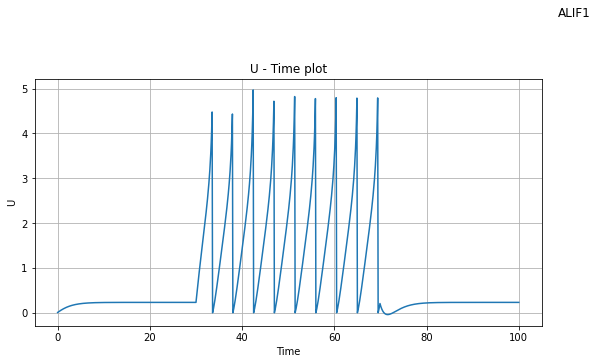

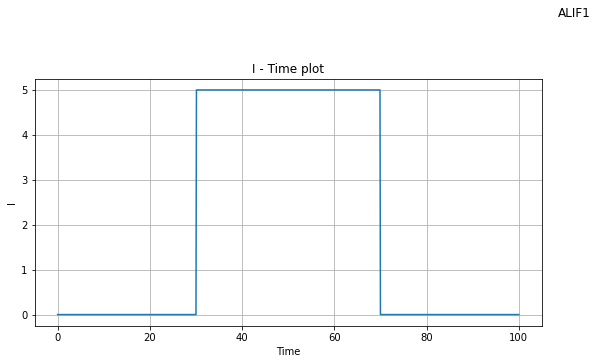

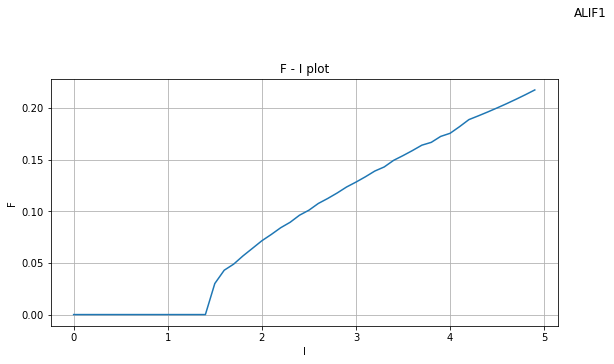

In [32]:
alif1 = ALIF(time_interval=100, C=5, threshold=5, save_name="ALIF1")
alif1.alif_function()
alif1.plot_U_t()
alif1.plot_i_t()
alif1.plot_F_I()

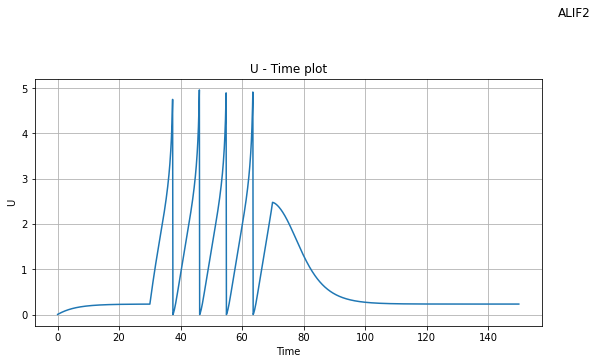

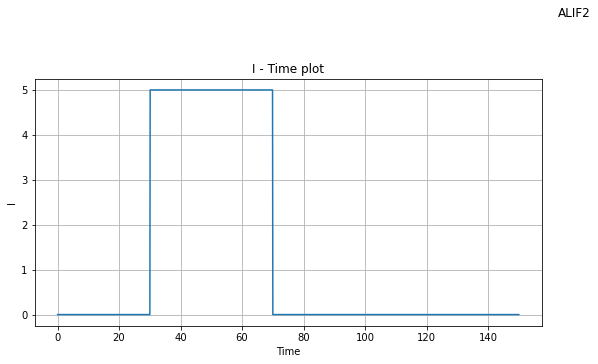

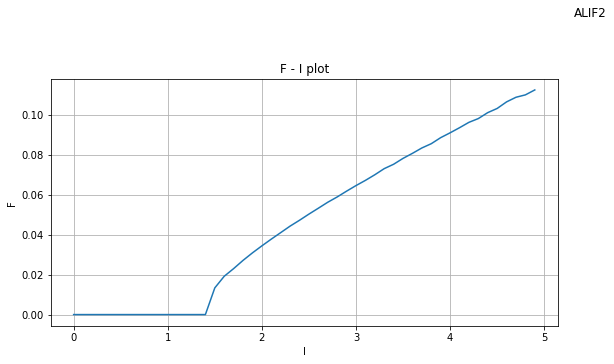

In [33]:
alif2 = ALIF(time_interval=150, C=10, threshold=5, save_name="ALIF2")
alif2.alif_function()
alif2.plot_U_t()
alif2.plot_i_t()
alif2.plot_F_I()